## Lingüística Computacional: Sails :)

## 1. Leemos los archivos

In [111]:
import pandas as pd

In [112]:
import glob as glob
## Aquí se lee todos los archivos de texto de la misma carpeta
archivos_txt = glob.glob('*.txt')
## Se crea el doc tipo excel
archivos = {fp.replace('.txt',''):pd.read_csv(fp, sep='\t') for fp in archivos_txt}

In [113]:
archivos.keys()
# Diccionario de rasgos (diccionario de diccionarios- nombres de los rasgos:lenguas:el rasgo)

# Rasgo ARGEX2-5: el número se puede marcar para A
# Rasgo ARGEX2-2: el número se puede marcar para S
# Rasgo ARGEX2-8: el número se puede marcar para P
# Rasgo NP610: a qué clase pertenecen los numerales nativos?
# Rasgo NP9: Hay una distinción de número en los pronombres de tercera persona?

dict_keys(['ARGEX2-2', 'ARGEX2-5', 'ARGEX2-8', 'NP610', 'NP9'])

In [114]:
for rasgo in archivos.keys():
    print(archivos[rasgo])
    #Visualizamos

   iso-639-3                  name value                  description  \
0        agr              Aguaruna     C            fused with person   
1        apy                Apalaí     ?                    Not known   
2        apu               Apurinã     C            fused with person   
3        arh               Arhuaco     C            fused with person   
4        kwi          Awa-Cuaiquer     B  independent suffix/enclitic   
..       ...                   ...   ...                          ...   
90       mtp  Wichí Lhamtés Nocten     B  independent suffix/enclitic   
91       xav               Xavánte     B  independent suffix/enclitic   
92       yaa             Yaminahua     D                         none   
93       ame              Yanesha'     C            fused with person   
94       yuz              Yuracaré     C            fused with person   

     latitude  longitude            family  
0   -5.300440 -77.921790           Chicham  
1    1.497920 -54.745700         

In [115]:
archivos['ARGEX2-2']
#un ejemplo tomando uno de los rasgos

,iso-639-3,name,value,description,latitude,longitude,family
0,agr,Aguaruna,C,fused with person,-5.300440,-77.921790,Chicham
1,apy,Apalaí,?,Not known,1.497920,-54.745700,Cariban
2,apu,Apurinã,C,fused with person,-8.216920,-66.771410,Arawakan
3,arh,Arhuaco,C,fused with person,10.701840,-73.636290,Chibchan
4,kwi,Awa-Cuaiquer,B,independent suffix/enclitic,1.216525,-78.340135,Barbacoan
...,...,...,...,...,...,...,...
90,mtp,Wichí Lhamtés Nocten,B,independent suffix/enclitic,-21.987995,-63.597110,Matacoan
91,xav,Xavánte,B,independent suffix/enclitic,-14.301730,-52.436690,Nuclear-Macro-Je
92,yaa,Yaminahua,D,none,-9.884597,-71.596433,Pano-Tacanan
93,ame,Yanesha',C,fused with person,-10.545390,-75.314970,Arawakan


## 2. Creamos diccionarios de rasgos

In [116]:
diccionarios = {}

for rasgo in archivos.keys():
    diccionario_rasgo = archivos[rasgo]
    # zip combina elementos de listas de manera ordenada/paralela y luego dict lo vuelve diccionario: se crea diccionario
    # nombre_valor con nombre de la lengua: el rasgo
    nombre_valor = dict(zip(diccionario_rasgo['name'],diccionario_rasgo['value']))
    diccionarios[rasgo] = nombre_valor
    # Ingresamos nombre_valor como value de diccionarios

In [117]:
diccionarios.keys()
# visualizamos los keys

dict_keys(['ARGEX2-2', 'ARGEX2-5', 'ARGEX2-8', 'NP610', 'NP9'])

In [118]:
diccionarios['ARGEX2-2']
# un ejemplo

{'Aguaruna': 'C',
 'Apalaí': '?',
 'Apurinã': 'C',
 'Arhuaco': 'C',
 'Awa-Cuaiquer': 'B',
 'Awetí': 'C',
 'Ayacucho Quechua': 'B',
 'Baure': 'C',
 'Bora': 'B',
 'Bororo': 'C',
 'Cajamarca Quechua': 'B',
 'Callawalla': 'B',
 'Canela': 'A',
 'Cavineña': 'D',
 'Central Aymara': 'B',
 'Chimila': 'C',
 'Chipaya': 'B',
 'Cholón': 'C',
 'Cocama-Cocamilla': 'C',
 'Cubeo': 'C',
 'Cusco Quechua': 'B',
 'Desano': 'C',
 'Dâw': 'D',
 'Emerillon': 'C',
 'Gavião Do Jiparaná': 'C',
 'Guató': 'C',
 'Hixkaryána': 'C',
 'Huallaga Huánuco Quechua': 'B',
 'Huangascar-Topara-Yauyos Quechua': 'D',
 'Huaylas Ancash Quechua': 'B',
 'Hupdë': 'D',
 'Ikpeng': 'B',
 'Imbabura Highland Quichua': 'D',
 'Inga': 'C',
 'Itonama': 'C',
 'Jamamadí': 'C',
 'Jaqaru': 'D',
 'Jauja Wanca Quechua': 'B',
 'Jurúna': 'D',
 'Kamayurá': 'C',
 'Kanoê': 'D',
 'Karitiâna': 'C',
 'Karo (Brazil)': 'C',
 'Katukína-Kanamarí': 'D',
 'Kwaza': 'C',
 'Lakondê': 'C',
 'Leco': 'C',
 'Lokono': 'C',
 'Makuráp': 'C',
 'Mapudungun': 'B',
 'Matsés'

In [119]:
## juntamos todas las lenguas

rasgos = {}

for rasgo in diccionarios.keys():
    lenguas = list(diccionarios[rasgo].keys())
    for lengua in lenguas:
        rasgos[lengua] = {}

In [120]:
 rasgos

{'Aguaruna': {},
 'Apalaí': {},
 'Apurinã': {},
 'Arhuaco': {},
 'Awa-Cuaiquer': {},
 'Awetí': {},
 'Ayacucho Quechua': {},
 'Baure': {},
 'Bora': {},
 'Bororo': {},
 'Cajamarca Quechua': {},
 'Callawalla': {},
 'Canela': {},
 'Cavineña': {},
 'Central Aymara': {},
 'Chimila': {},
 'Chipaya': {},
 'Cholón': {},
 'Cocama-Cocamilla': {},
 'Cubeo': {},
 'Cusco Quechua': {},
 'Desano': {},
 'Dâw': {},
 'Emerillon': {},
 'Gavião Do Jiparaná': {},
 'Guató': {},
 'Hixkaryána': {},
 'Huallaga Huánuco Quechua': {},
 'Huangascar-Topara-Yauyos Quechua': {},
 'Huaylas Ancash Quechua': {},
 'Hupdë': {},
 'Ikpeng': {},
 'Imbabura Highland Quichua': {},
 'Inga': {},
 'Itonama': {},
 'Jamamadí': {},
 'Jaqaru': {},
 'Jauja Wanca Quechua': {},
 'Jurúna': {},
 'Kamayurá': {},
 'Kanoê': {},
 'Karitiâna': {},
 'Karo (Brazil)': {},
 'Katukína-Kanamarí': {},
 'Kwaza': {},
 'Lakondê': {},
 'Leco': {},
 'Lokono': {},
 'Makuráp': {},
 'Mapudungun': {},
 'Matsés': {},
 'Mochica': {},
 'Mocoví': {},
 'Mosetén': {

In [121]:
len(rasgos)
## n° lenguas

117

In [122]:
for rasgo in diccionarios.keys():
    for lengua in rasgos.keys():
        if lengua in diccionarios[rasgo].keys():
            rasgos[lengua][rasgo]=diccionarios[rasgo][lengua]

In [123]:
rasgos

{'Aguaruna': {'ARGEX2-2': 'C',
  'ARGEX2-5': 'C',
  'ARGEX2-8': 'C',
  'NP610': '?',
  'NP9': 'B'},
 'Apalaí': {'ARGEX2-2': '?', 'ARGEX2-5': '?', 'ARGEX2-8': '?'},
 'Apurinã': {'ARGEX2-2': 'C',
  'ARGEX2-5': 'C',
  'ARGEX2-8': 'C',
  'NP610': '?',
  'NP9': 'B'},
 'Arhuaco': {'ARGEX2-2': 'C',
  'ARGEX2-5': 'C',
  'ARGEX2-8': 'C',
  'NP610': '?',
  'NP9': 'B'},
 'Awa-Cuaiquer': {'ARGEX2-2': 'B',
  'ARGEX2-5': 'B',
  'ARGEX2-8': 'B',
  'NP610': 'A',
  'NP9': 'B'},
 'Awetí': {'ARGEX2-2': 'C', 'ARGEX2-5': 'C', 'ARGEX2-8': 'C'},
 'Ayacucho Quechua': {'ARGEX2-2': 'B',
  'ARGEX2-5': 'B',
  'ARGEX2-8': 'B',
  'NP610': 'A',
  'NP9': 'B'},
 'Baure': {'ARGEX2-2': 'C',
  'ARGEX2-5': 'C',
  'ARGEX2-8': 'C',
  'NP610': 'A',
  'NP9': 'B'},
 'Bora': {'ARGEX2-2': 'B',
  'ARGEX2-5': 'D',
  'ARGEX2-8': 'D',
  'NP610': 'C',
  'NP9': 'C'},
 'Bororo': {'ARGEX2-2': 'C',
  'ARGEX2-5': 'C',
  'ARGEX2-8': 'C',
  'NP610': '?',
  'NP9': 'B'},
 'Cajamarca Quechua': {'ARGEX2-2': 'B',
  'ARGEX2-5': 'B',
  'ARGEX2-8':

In [124]:
rasgos['Yaminahua']

{'ARGEX2-2': 'D', 'ARGEX2-5': 'D', 'ARGEX2-8': 'D', 'NP610': '?', 'NP9': 'A'}

In [125]:
rasgos['Aguaruna']

{'ARGEX2-2': 'C', 'ARGEX2-5': 'C', 'ARGEX2-8': 'C', 'NP610': '?', 'NP9': 'B'}

## 3. Distancias

In [126]:
## distancia de Hamming!

def hamming(nombre1,nombre2):
    ## número de rasgos en que las lenguas difieren
    d = 0
    ## número total de rasgos en común
    n = 0
    ## accedemos a los diccionarios de rasgos
    lengua1 = rasgos[nombre1]
    lengua2 = rasgos[nombre2]
    ## contamos con un ciclo for
    for rasgo in lengua1.keys():
        ## nos preguntamos si rasgo pertenece a ambas lenguas
        if rasgo in lengua2.keys():
            ## revisamos si poseen valores distintos
            if lengua1[rasgo] != lengua2[rasgo] and lengua1[rasgo]!='?' and lengua2[rasgo]!='?':
            #if lengua1[rasgo] != lengua2[rasgo]:

                ## en este caso sumamos 1 a d
                d += 1.0
            ## número total de rasgos
            n += 1.0
    ## entregamos la división entre el número rasgos en que las lenguas difieren y el número total de rasgos comunes
    return d/n

In [127]:
hamming('Aguaruna','Yaminahua')
# distancia hamming entre Aguaruna y Yaminahua

0.8

In [128]:
lengua_comp = 'Aguaruna'
## Lengua para comparar

In [129]:
distancias = {}

In [130]:
for lengua in rasgos.keys():
    distancias[lengua]=hamming(lengua_comp,lengua)

In [131]:
distancias_ordenadas = dict(sorted(distancias.items(), key=lambda item: item[1]))

In [132]:
distancias_ordenadas

{'Aguaruna': 0.0,
 'Apalaí': 0.0,
 'Apurinã': 0.0,
 'Arhuaco': 0.0,
 'Awetí': 0.0,
 'Baure': 0.0,
 'Bororo': 0.0,
 'Chimila': 0.0,
 'Cholón': 0.0,
 'Cocama-Cocamilla': 0.0,
 'Emerillon': 0.0,
 'Gavião Do Jiparaná': 0.0,
 'Guató': 0.0,
 'Hixkaryána': 0.0,
 'Inga': 0.0,
 'Itonama': 0.0,
 'Jamamadí': 0.0,
 'Kamayurá': 0.0,
 'Karo (Brazil)': 0.0,
 'Lakondê': 0.0,
 'Leco': 0.0,
 'Lokono': 0.0,
 'Makuráp': 0.0,
 'Movima': 0.0,
 'Mundurukú': 0.0,
 'Puinave': 0.0,
 'Sakirabia': 0.0,
 'Santiago del Estero Quichua': 0.0,
 'Sateré-Mawé': 0.0,
 'Shawi': 0.0,
 'South Bolivian Quechua': 0.0,
 'Southern Pastaza Quechua': 0.0,
 'Trió': 0.0,
 'Wari': 0.0,
 'Wayoró': 0.0,
 "Yanesha'": 0.0,
 'Yuracaré': 0.0,
 'Arabela': 0.0,
 'Ayoreo': 0.0,
 'Chamacoco': 0.0,
 'Cofán': 0.0,
 'Iquito': 0.0,
 'Kadiwéu': 0.0,
 'Lao': 0.0,
 'Maca': 0.0,
 'Panare': 0.0,
 'Papiamento': 0.0,
 'Reyesano': 0.0,
 'Russian': 0.0,
 "Selk'nam": 0.0,
 'Siona-Tetete': 0.0,
 'Southern Aymara': 0.0,
 'Spanish': 0.0,
 'Toba': 0.0,
 'Turki

## Tarea computacional!
### Distancias de Hamming para lenguas de Sudamérica

1. **Elegir 5 rasgos de Sails.** Descargue los datos en formato txt. La selección debe ser coherente con el fin de facilitar la interpretación de los resultados.
2. Lea los 5 archivos mediante **Pandas**. Con esta información, **construya un diccionario de rasgos.** Si el mismo procedimiento desarrollado en este notebook.
3. Elija **una lengua** para comparar.
4. Calcule **distancias de Hamming** entre **la lengua elegida y todas las demás.** Ordene las distancias de forma creciente. 
5. **Concluya** acerca de sus resultados. 
6. Entregue un **notebook** con sus cálculos. Trate de explicar muy bien tanto los pasos de análisis como las conclusiones finales. 

## 4. Visualización 1

In [133]:
#import matplotlib.pyplot as plt

#fig, ax = plt.subplots(dpi=800)

#ax.plot(range(len(distancias_ordenadas)),distancias_ordenadas.values(),marker='o',color='blue',markersize=3,markeredgewidth=0.5,markeredgecolor='k',alpha=0.75,linewidth=1,fillstyle='full')

#plt.xlabel(r'distancia de Hamming',fontsize=10)
#plt.ylabel(r'número de lenguas',fontsize=10)
#plt.rcParams.update({'font.size': 10})
#plt.savefig('distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
#plt.show()

## 5. Visualización 2

In [134]:
lenguajes = pd.read_csv('languages.csv', sep=',')

In [135]:
lenguajes

,ID,Name,Macroarea,Latitude,Longitude,Glottocode,ISO639P3code,Family_Glottocode,Family_Name,Status,Parent_Glottocode
0,guri1248,Guriaso,Papunesia,-3.571800,141.597000,guri1248,grx,NaN,NaN,shifting,NaN
1,pawa1255,Pawaia,Papunesia,-6.880210,145.081000,pawa1255,pwa,NaN,NaN,shifting,NaN
2,guam1236,Guamo,South America,8.235103,-67.401875,guam1236,NaN,NaN,NaN,extinct,NaN
3,dama1272,Damal,Papunesia,-4.173450,137.496000,dama1272,uhn,NaN,NaN,shifting,NaN
4,puqu1242,Puquina,South America,-15.899200,-69.961100,puqu1242,puq,NaN,NaN,extinct,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8113,guan1268,Guana (Paraguay),South America,-21.980300,-58.065400,guan1268,gva,leng1261,Lengua-Mascoy,shifting,east2852
8114,sana1298,Sanapaná,South America,-22.490000,-58.380000,sana1298,spn,leng1261,Lengua-Mascoy,shifting,east2852
8115,anga1316,Angaité,South America,-22.850000,-58.450000,anga1316,aqt,leng1261,Lengua-Mascoy,moribund,east2852
8116,gily1242,Amur Nivkh,Eurasia,52.590000,140.681000,gily1242,niv,nivk1234,Nivkh,moribund,nivk1234


In [136]:
## veamos las columnas

lenguajes.columns

Index(['ID', 'Name', 'Macroarea', 'Latitude', 'Longitude', 'Glottocode',
       'ISO639P3code', 'Family_Glottocode', 'Family_Name', 'Status',
       'Parent_Glottocode'],
      dtype='object')

In [137]:
## ¿Y si filtramos por lenguas de Sudamérica?

SA = lenguajes[lenguajes['Macroarea']=='South America']

In [138]:
## nombres de lenguas
nombres = list(SA['Name'])

In [139]:
## hagamos un gráfico de posiciones geográficas :)

latitud = list(SA['Latitude'])
longitud = list(SA['Longitude'])

In [140]:
latitud_longitud = list(zip(latitud,longitud))

In [141]:
latitud_longitud

[(8.2351027, -67.4018753),
 (-15.8992, -69.9611),
 (-27.4063, -58.9661),
 (4.0673594, -62.8676118),
 (-13.8115, -65.6348),
 (-5.7441796, -76.426712),
 (3.436864, -76.522636),
 (-13.2482, -65.4822),
 (-55.2748, -68.2648),
 (-23.0, -69.0),
 (-25.221839000000006, -61.887818),
 (-12.80431, -64.35748000000001),
 (3.969231, -64.235892),
 (-8.953642, -38.2742287),
 (7.50851, -59.3528),
 (-13.636709, -62.2020909),
 (0.276675, -77.0643),
 (-12.7178, -57.9806),
 (-8.999989999999997, -37.0167),
 (3.92974, -67.6886),
 (7.223905999999999, -71.420238),
 (0.834931, -79.778137),
 (1.14537, -76.8931),
 (-0.53751, -72.0869),
 (-6.7771300000000005, -61.8167),
 (-8.01667, -79.0),
 (-15.0092, -67.8818),
 (-24.315323100000004, -50.5580261),
 (-5.568969, -80.82824699999998),
 (-16.769554, -61.817795),
 (-8.6606156, -37.0869089),
 (7.10677, -67.5996),
 (-3.22497, -75.5603),
 (-4.44006, -75.4211),
 (2.716, -73.768),
 (-12.6695, -60.5353),
 (-4.23835, -76.9347),
 (-12.1789, -64.5812),
 (8.848165, -70.975342),
 

In [142]:
dict_lat_lon = dict(zip(nombres,latitud_longitud))

In [143]:
dict_lat_lon = {lengua:dict_lat_lon[lengua] for lengua in distancias if lengua in dict_lat_lon.keys()}

In [144]:
len(dict_lat_lon)

106

In [145]:
dict_lat_lon

{'Aguaruna': (-5.30044, -77.9218),
 'Apalaí': (1.49792, -54.7457),
 'Apurinã': (-8.21692, -66.7714),
 'Arhuaco': (10.7018, -73.6363),
 'Awa-Cuaiquer': (1.21652, -78.3401),
 'Awetí': (-12.381944, -53.391944),
 'Ayacucho Quechua': (-13.84714, -74.32245999999998),
 'Baure': (-13.1278, -64.1838),
 'Bora': (-2.000259, -72.25706600000002),
 'Bororo': (-16.6029, -55.2004),
 'Cajamarca Quechua': (-7.093139999999999, -78.3214),
 'Callawalla': (-15.88451, -68.10176),
 'Cavineña': (-13.3544, -66.6277),
 'Central Aymara': (-17.0, -68.5),
 'Chimila': (10.1902, -74.2559),
 'Chipaya': (-18.73951, -67.89633),
 'Cholón': (-9.23129, -75.9621),
 'Cocama-Cocamilla': (-4.5, -74.0),
 'Cubeo': (1.32382, -70.1939),
 'Cusco Quechua': (-14.0853, -71.7663),
 'Desano': (0.58157, -69.4955),
 'Dâw': (-0.1177, -67.2934),
 'Gavião Do Jiparaná': (-10.7235, -61.6752),
 'Guató': (-17.8696, -57.2897),
 'Hixkaryána': (-0.16265, -58.80153000000001),
 'Huallaga Huánuco Quechua': (-9.57135, -75.594),
 'Huangascar-Topara-Yauy

In [146]:
Y = list(zip(*dict_lat_lon.values()))[0]
X = list(zip(*dict_lat_lon.values()))[1]

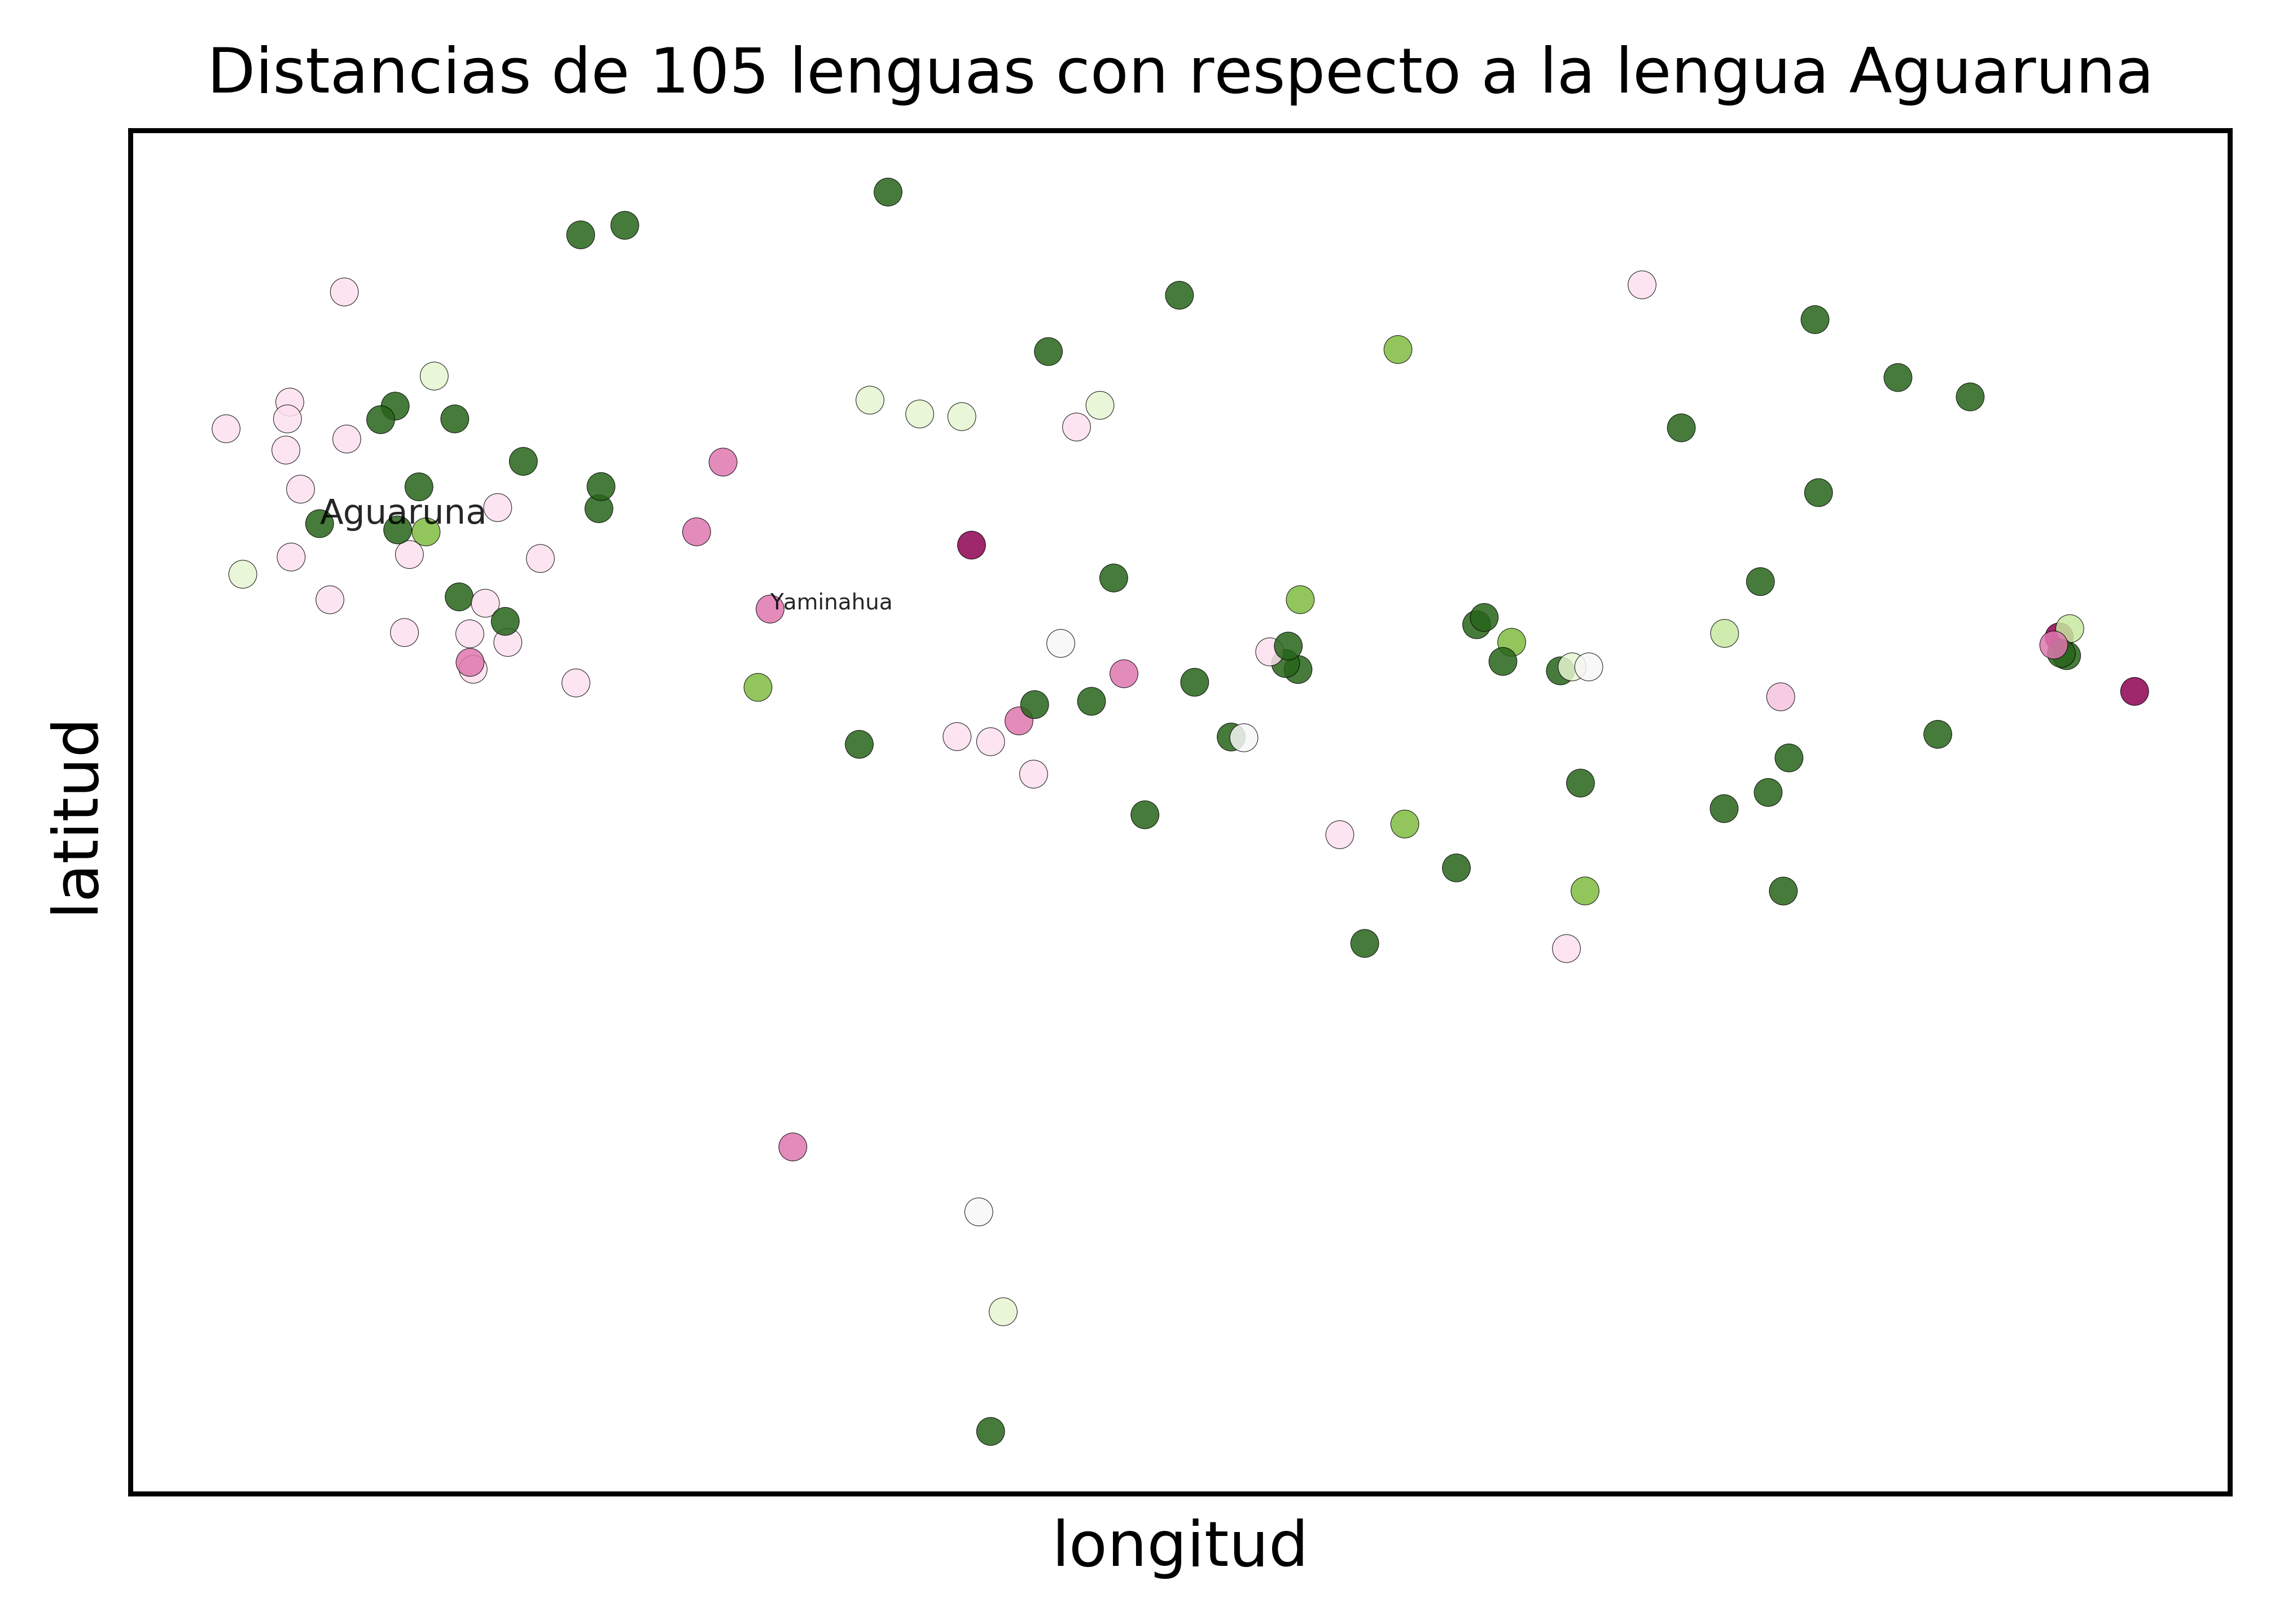

In [147]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

L = [lengua_comp,'Yaminahua']

#for lengua in list(distancias_ordenadas.keys())[:10]+list(distancias_ordenadas.keys())[-10:]:
for lengua in L:
    if lengua in dict_lat_lon.keys():
        if lengua == lengua_comp:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=5.5, alpha=0.85)
        else:
            i = list(dict_lat_lon.keys()).index(lengua)
            ax.annotate(lengua, color='k', xy=(X[i]-0.0004,Y[i]-0.0004), fontsize=3.5, alpha=0.85)

ax.scatter(X,Y,c=[distancias[lengua] for lengua in dict_lat_lon.keys()], s=20, edgecolors='k',linewidths=0.1, cmap=plt.cm.get_cmap('PiYG').reversed(),alpha=0.85)

plt.grid(False)
plt.title('Distancias de {}'.format(len(dict_lat_lon)-1)+' lenguas con respecto a la lengua {}'.format(lengua_comp),fontsize=10)
ax.set_yticks([])
ax.set_xticks([])
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'latitud',fontsize=10)
plt.xlabel(r'longitud',fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('mapa_distancias.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()

<h1> SOBRE LA INTERPRETACIÓN... </h1>

En este gráfico vemos la distancia hamming con 105 lenguas tomando como punto de referencia el Aguaruna o Awajún, así como la distribución geográfica de las lenguas de acuerdo con sus coordenadas cartesianas, longitud y latitud. Para medir esta distancia hemos empleado los datos de las lenguas alrededor de 5 tipos de rasgos relacionados al **número** o a los **numerales**:

- Rasgo ARGEX2-5: el número se puede marcar para A
- Rasgo ARGEX2-2: el número se puede marcar para S
- Rasgo ARGEX2-8: el número se puede marcar para P
- Rasgo NP610: A qué clase pertenecen los numerales nativos?
- Rasgo NP9: Hay una distinción de número en los pronombres de tercera persona?

, donde los 3 primeros pertenecen al dominio de *Argument Marking* o marcación de argumentos, y los 2 finales pertenecen a *NP-Numerals* o frase nominal-numerales y *NP-Free personal pronouns* o frase nominal-pronombres personales libres.

Entonces, este método de medición nos indicará la “distancia” o la coincidencia de un grupo de lenguas en relación a una lengua en base a estos cinco rasgos, arrojándonos un valor numérico entre 0.00-1.00, donde el valor más bajo es el más próximo a la lengua de comparación y el valor más alto es el más lejano. Gráficamente, esto se representa a través los puntos en verde, que son los más cercanos o que tienen mayor coincidencia a la lengua de comparación, y los puntos en magenta, que son los más distantes o que exhiben una menor coincidencia con respecto a la lengua de comparación. Igualmente, mientras más próximo se encuentre el valor a uno de los extremos, mayor será la intensidad del color del punto; complementariamente, los valores centrales se muestran por colores con mayor transparencia.

De este modo, seleccionamos el Yaminahua como un ejemplo para entender esto. Por un lado, el Yaminahua es una lengua amazónica sintética de la familia linguística Pano del departamento de Ucayali en el Perú; sin embargo, también encontramos pueblo homónimos en el Estado de Acre, Brasil y en el departamento de Pando, Bolivia. Entre otros datos generales encontramos que es principalmente sufijante y es una lengua con ergatividad escindida, donde los nombres y los pronombres de tercera persona poseen un alineamiento ergativo-absolutivo y los pronombres de primera y segunda persona, un alineamiento nominativo-acusativo. Por otro lado, el Aguaruna o Awajún es una lengua amazónica bastante aunque no exclusivamente aglutinante de familia lingüística Jíbaro hablada en los departamentos de Amazonas, Cajamarca, San Martín y Loreto. Asimismo, posee un alineamiento morfosintáctico nominativo-acusativo estricto y un orden de palabras predominantemente SOV.

De acuerdo con los datos calculados, encontramos que la distancia hamming entre el Aguaruna y el Yaminahua corresponde al 0.8. Esto quiere decir que los rasgos de ambas lenguas tienen una baja coincidencia. Si bien no se encuentran muy distanciadas geográficamente, no habría de sorprendernos demasiado esta diferencia porque se trata, al fin y al cabo, de lenguas de familias lingüística diferentes que podrían tener rasgos distintos. Además, recordamos que la mayor parte de nuestros rasgo se relacionan al dominio de la marca argumental. De este modo, la distancia también podría explicarse desde este punto si tomamos en consideración las características morfosintácticas de estas dos lenguas: como decíamos, el yaminahua es una lengua sintética de con ergatividad escinda, mientras que el aguaruna es una lengua bastante aglutinante con alineamiento estrictamente nominativo-acusativo. Este podría ser el origen de su divergencia. Esto lo podemos ver de manera más clara a partir de la siguiente tabla con la información de los rasgos resumidos para cada lengua:

<table border="0">
 <tr>
    <td><b style="font-size:10px"><center> Rasgo</center> </b></td>
    <td><b style="font-size:10px"><center>Yaminahua</center> </b></td>
    <td><b style="font-size:10px"><center>Descripción del rasgo</center> </b></td>
    <td><b style="font-size:10px"><center>Aguaruna</center> </b></td>
    <td><b style="font-size:10px"><center>Descripción del rasgo</center> </b></td>
 </tr>
 <tr>
     <td><center> ARGEX2-2: el número se puede marcar para S<br>
ARGEX2-5: el número se puede marcar para A<br>
ARGEX2-8: el número se puede marcar para P<br>
NP610: A qué clase pertenecen los numerales nativos?<br>
NP9: Hay una distinción de número en los pronombres de tercera persona?</center> <br>
</td>
    <td><center> 'D'<br>
'D’<br>
'D'<br>
'?'<br>
'A'<br></center>
</td>
     <td><center> fusionado con persona <br>
fusionado con persona<br>
No tiene<br>
No se sabe<br>
No hay distinción de número<br></center>
</td>
    <td><center>'C’<br>
'C’<br>
'C'<br>
'?'<br>
'B'<br></center>
</td>
    <td> <center>No tiene<br>
No tiene <br>
No tiene<br>
No se sabe<br>
SG/PL<br></center>
</td>
 </tr>
</table>


**Fuentes adicionales:**<br>
https://bdpi.cultura.gob.pe/pueblos/yaminahua <br>
https://en.wikipedia.org/wiki/Yaminawa_language<br>
https://bdpi.cultura.gob.pe/lenguas/awajun<br>
https://es.wikipedia.org/wiki/Idioma_aguaruna<br>


## 6. Visualización 3

In [148]:
!pip install haversine

In [149]:
from haversine import haversine

In [150]:
distancias_geo_lengua_comp = {}

for lengua in dict_lat_lon.keys():
    distancias_geo_lengua_comp[lengua]=haversine(dict_lat_lon[lengua],dict_lat_lon[lengua_comp])

In [151]:
distancias_geo_lengua_comp

{'Aguaruna': 0.0,
 'Apalaí': 2682.8136260883684,
 'Apurinã': 1273.0853049666048,
 'Arhuaco': 1841.5339448281386,
 'Awa-Cuaiquer': 726.1416011147867,
 'Awetí': 2805.6141028077022,
 'Ayacucho Quechua': 1028.8849378830323,
 'Baure': 1739.8721526563643,
 'Bora': 727.8079379700764,
 'Bororo': 2776.1677065623744,
 'Cajamarca Quechua': 204.17486529774,
 'Callawalla': 1591.6685485154542,
 'Cavineña': 1528.0335931207535,
 'Central Aymara': 1656.7360679285068,
 'Chimila': 1769.6864553142796,
 'Chipaya': 1848.1384217060754,
 'Cholón': 487.6004479547125,
 'Cocama-Cocamilla': 443.50942216801934,
 'Cubeo': 1131.0378596739597,
 'Cusco Quechua': 1186.7717072809694,
 'Desano': 1141.6730617433884,
 'Dâw': 1313.2942988859188,
 'Gavião Do Jiparaná': 1887.0262001188066,
 'Guató': 2641.831723333124,
 'Hixkaryána': 2198.4506508796953,
 'Huallaga Huánuco Quechua': 539.794153272755,
 'Huangascar-Topara-Yauyos Quechua': 900.4693083338657,
 'Huaylas Ancash Quechua': 454.6965272423078,
 'Ikpeng': 2769.30891687208

In [152]:
dict_geo_tip = {}

for lengua in distancias_geo_lengua_comp.keys():
    dict_geo_tip[lengua]=[distancias_geo_lengua_comp[lengua],distancias[lengua]]

In [153]:
dict_geo_tip

{'Aguaruna': [0.0, 0.0],
 'Apalaí': [2682.8136260883684, 0.0],
 'Apurinã': [1273.0853049666048, 0.0],
 'Arhuaco': [1841.5339448281386, 0.0],
 'Awa-Cuaiquer': [726.1416011147867, 0.6],
 'Awetí': [2805.6141028077022, 0.0],
 'Ayacucho Quechua': [1028.8849378830323, 0.6],
 'Baure': [1739.8721526563643, 0.0],
 'Bora': [727.8079379700764, 0.8],
 'Bororo': [2776.1677065623744, 0.0],
 'Cajamarca Quechua': [204.17486529774, 0.6],
 'Callawalla': [1591.6685485154542, 0.8],
 'Cavineña': [1528.0335931207535, 0.8],
 'Central Aymara': [1656.7360679285068, 0.6],
 'Chimila': [1769.6864553142796, 0.0],
 'Chipaya': [1848.1384217060754, 0.6],
 'Cholón': [487.6004479547125, 0.0],
 'Cocama-Cocamilla': [443.50942216801934, 0.0],
 'Cubeo': [1131.0378596739597, 0.4],
 'Cusco Quechua': [1186.7717072809694, 0.2],
 'Desano': [1141.6730617433884, 0.4],
 'Dâw': [1313.2942988859188, 0.6],
 'Gavião Do Jiparaná': [1887.0262001188066, 0.0],
 'Guató': [2641.831723333124, 0.0],
 'Hixkaryána': [2198.4506508796953, 0.0],
 

In [154]:
import random

X = [dict_geo_tip[localidad][0] for localidad in dict_geo_tip.keys()]
Y = [dict_geo_tip[localidad][1]+random.random()/50 for localidad in dict_geo_tip.keys()]

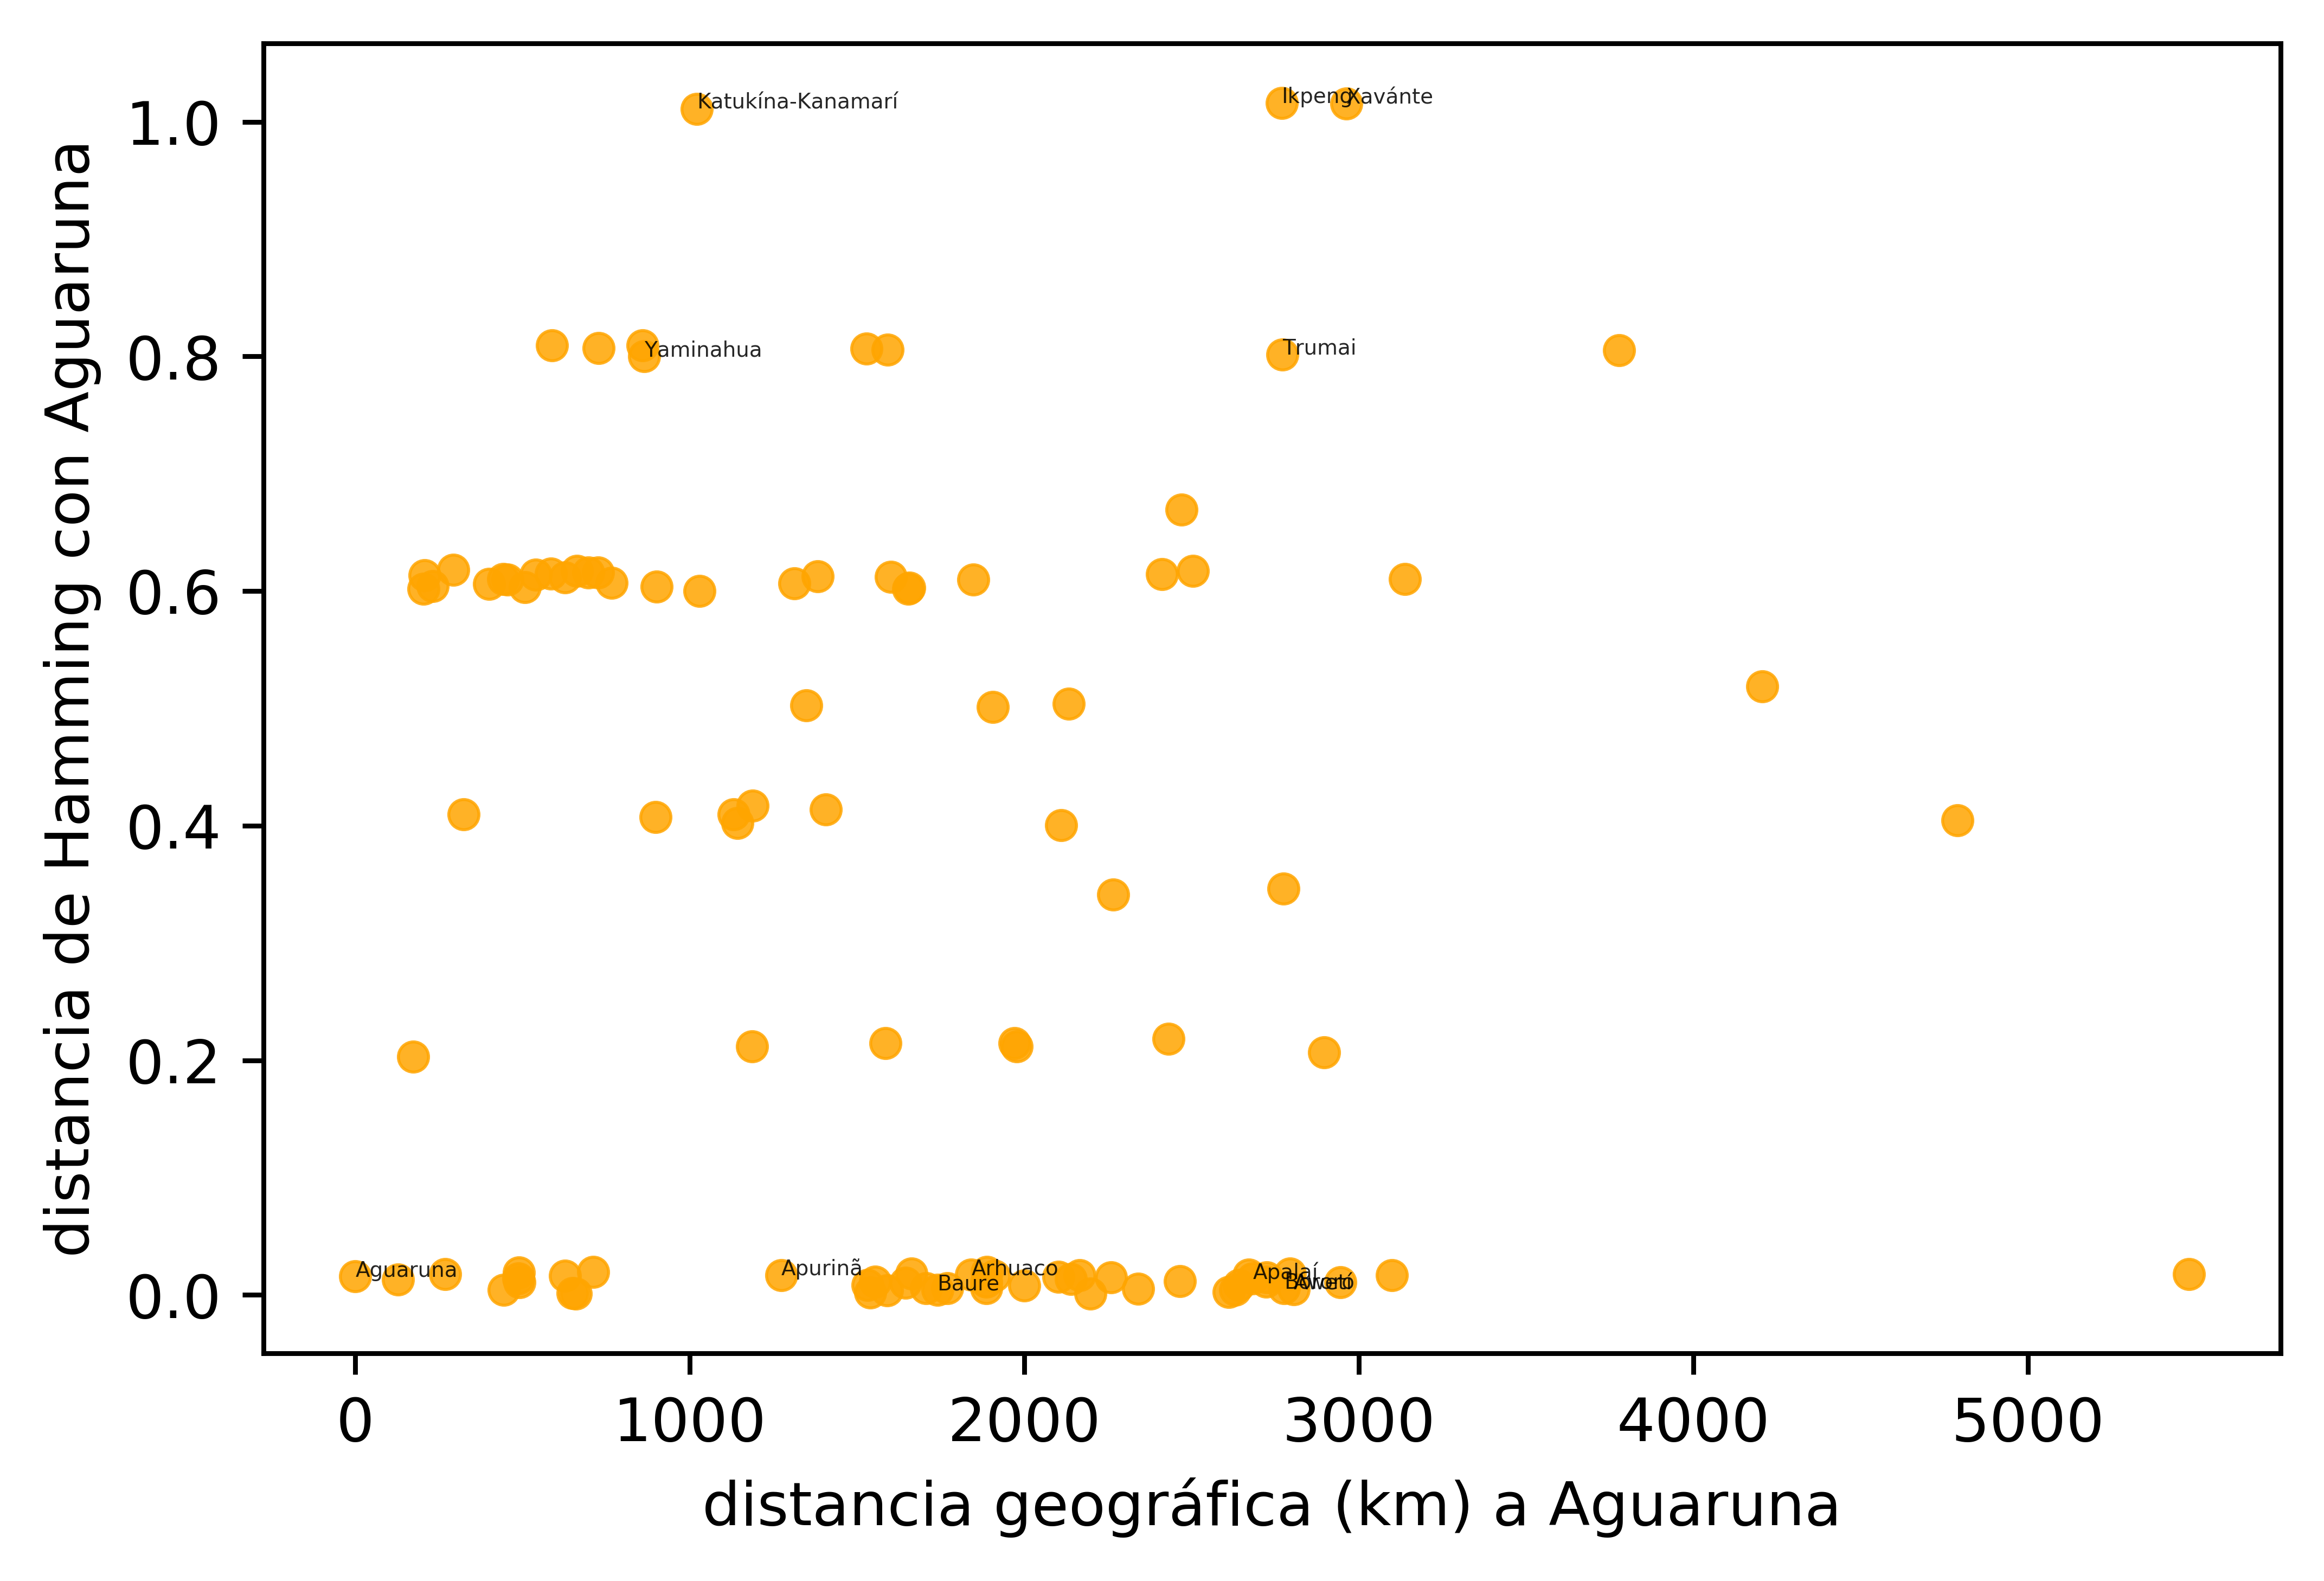

In [155]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=800)

for lengua in list(distancias_ordenadas.keys())[:7]+list(distancias_ordenadas.keys())[-5:]:
    if lengua in dict_geo_tip.keys():
        i = list(dict_geo_tip.keys()).index(lengua)
        ax.annotate(lengua, color='k', xy=(X[i],Y[i]), fontsize=3.5, alpha=0.85)

ax.plot(X,Y ,marker='o',color='orange',linewidth=0,markersize=5,markeredgewidth=0.5,markeredgecolor=None,alpha=0.85,fillstyle='full',clip_on=True)

plt.grid(False)
#plt.legend(loc='best',fontsize=7)
plt.ylabel(r'distancia de Hamming con {}'.format(lengua_comp),fontsize=10)
plt.xlabel(r'distancia geográfica (km) a {}'.format(lengua_comp),fontsize=10)
plt.rcParams.update({'font.size': 10})
#plt.savefig('geo_tip.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
plt.show()